# Week Three - Part 2 - Assignment Data Sets
### Data 620 Web Analytics
### Maliat Islam, Layla Quinones, and Karim Hammoud

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

Dataset.

Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

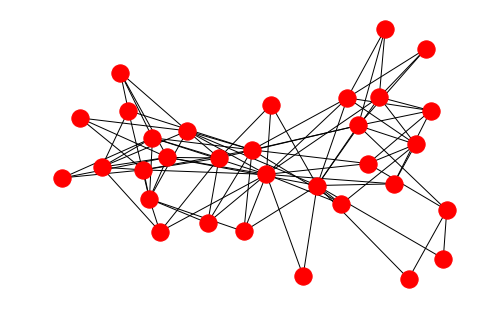

In [18]:
# Importing the libraries
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
import pandas as pd
import scipy as sp
from prettytable import PrettyTable


G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

nx.draw(G)
plt.show()

In [7]:
### project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
pd.DataFrame(list(W.degree()),columns=["Member","#Friends"]).sort_values('#Friends', ascending=False)

,Member,#Friends
0,Evelyn Jefferson,17
8,Ruth DeSand,17
14,Helen Lloyd,17
13,Nora Fayette,17
12,Sylvia Avondale,17
9,Verne Sanderson,17
2,Theresa Anderson,17
7,Pearl Oglethorpe,16
10,Myra Liddel,16
11,Katherina Rogers,16


In [8]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
pd.DataFrame(list(W.degree(W, weight='weight')),columns=["Member","#Meetings"]).sort_values('#Meetings', ascending=False)

,Member,#Meetings
2,Theresa Anderson,57
0,Evelyn Jefferson,50
3,Brenda Rogers,46
12,Sylvia Avondale,46
1,Laura Mandeville,45
13,Nora Fayette,43
8,Ruth DeSand,40
9,Verne Sanderson,38
11,Katherina Rogers,37
6,Eleanor Nye,36


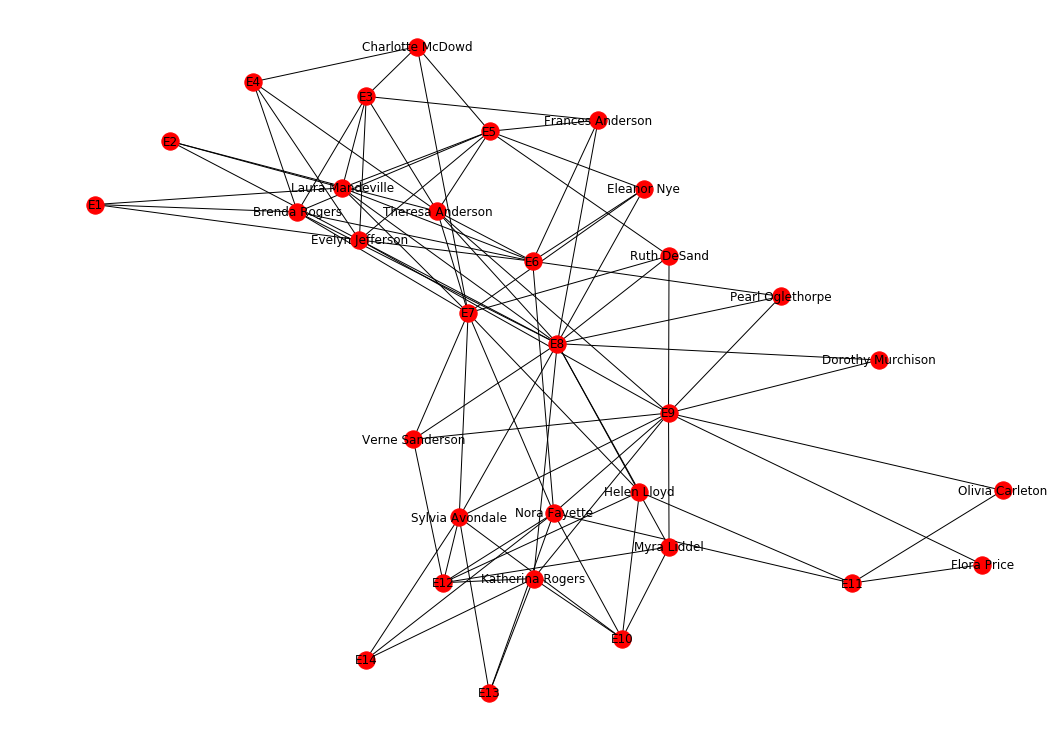

In [9]:
#plot 

plt.figure(figsize=(14, 10))
nx.draw(G,with_labels = True)
plt.show()

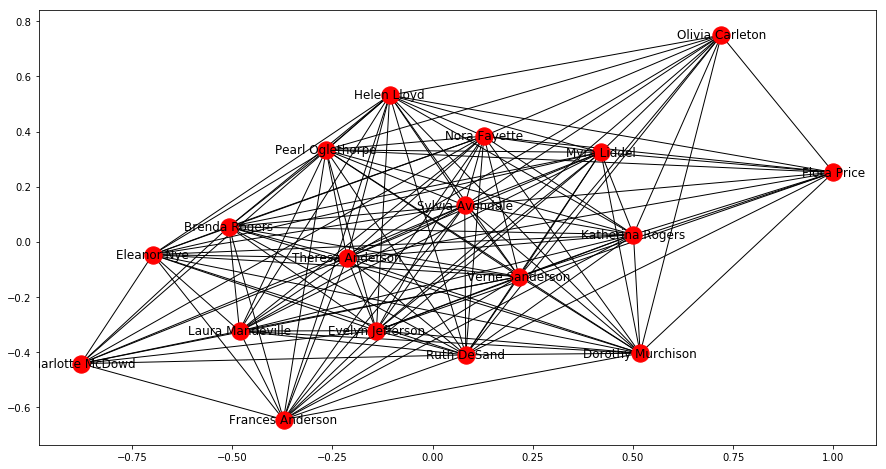

In [10]:
# Women Network and relationship:
plt.figure(figsize=(15,8))
W = bipartite.weighted_projected_graph(G, women, ratio=False)
nx.draw_networkx(W, with_labels=True)

In [11]:
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


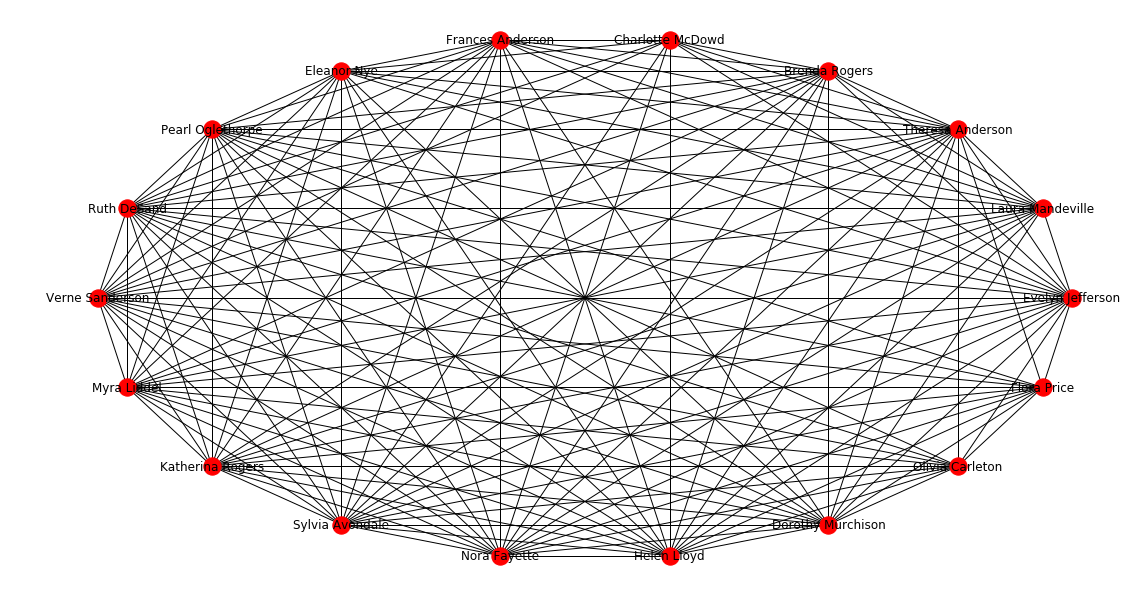

In [12]:
# Using the circular plot
plt.figure(figsize=(15,8))
nx.draw_circular(W, with_labels=True)

In [13]:
# Setting up a table for the centrality measures, here we added function for it

def PTable(graph):
   degree = nx.degree(graph)
   degree_centrality = nx.degree_centrality(graph)
   betweenness_centrality = nx.betweenness_centrality(graph)
   closeness_centrality = nx.closeness_centrality(graph)
   eigenvector_centrality = nx.eigenvector_centrality_numpy(graph)
   
   table = [[name,degree[name], round(degree_centrality[name],3), round(betweenness_centrality[name],3),
             round(closeness_centrality[name],3), round(eigenvector_centrality[name],3)] for name in graph.nodes()]
   table = sorted(table,key = lambda x: -x[2])
   Ptable = PrettyTable(['Subject','Degree','Degree Centrality','Betweenness','Closeness','Eigenvector'])
   
   for i in range(0, len(table)):
       Ptable.add_row(table[i])
   return Ptable

In [14]:
print((PTable(W)))

+-------------------+--------+-------------------+-------------+-----------+-------------+
|      Subject      | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+-------------------+--------+-------------------+-------------+-----------+-------------+
|  Evelyn Jefferson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Theresa Anderson |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Ruth DeSand    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Verne Sanderson  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Sylvia Avondale  |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Nora Fayette   |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|    Helen Lloyd    |   17   |        1.0        |     0.01    |    1.0    |    0.254    |
|  Pearl Oglethorpe |   16   |       0.941       |    0.005    |   0.944   |    0.243    |

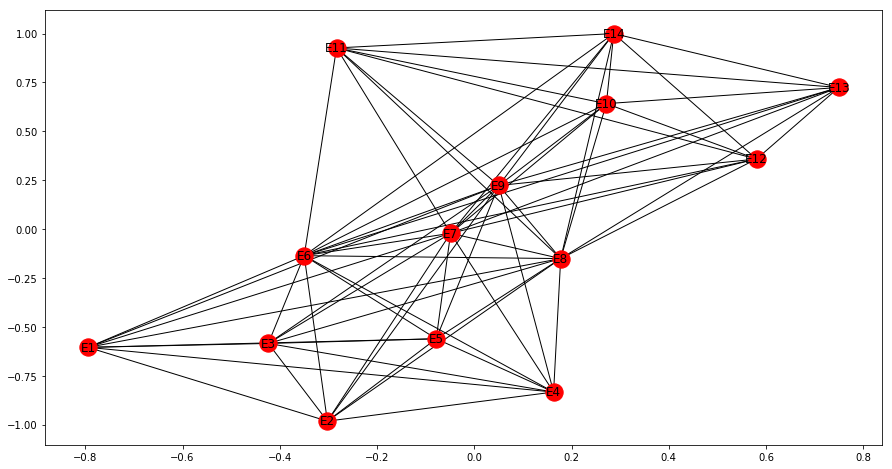

In [15]:

#Clubs Network and relationship:
plt.figure(figsize=(15,8))
C = bipartite.weighted_projected_graph(G, clubs, ratio=False)
nx.draw_networkx(C, with_labels=True)

In [16]:
# checking the nodes and edges
print(nx.info(C))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


In [17]:
# Print the centrilality measures for each nodes.
print((PTable(C)))

+---------+--------+-------------------+-------------+-----------+-------------+
| Subject | Degree | Degree Centrality | Betweenness | Closeness | Eigenvector |
+---------+--------+-------------------+-------------+-----------+-------------+
|    E6   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E7   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E8   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E9   |   13   |        1.0        |     0.08    |    1.0    |    0.339    |
|    E1   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E2   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E3   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E4   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|    E5   |   8    |       0.615       |     0.0     |   0.722   |    0.232    |
|   E10   |   8    |       0

### Conclusion
we can see nodes E6, E7, E8,E9 have hhe highest degree and centrality measures, this shows they have the highest netwrok between their group.
